# 1. Problem Statement
 
Students are expected to identify a classification / regression problem of your choice. You have to detail the problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?
   2. What kind of prediction (classification / regression) task are you performing?

ENSURE THAT YOU ARE USING NUMERICAL / CATEGORICAL DATA only.

DO NOT use images or textual data.

Score: 1 Mark in total (0.5 mark each)

Ans: 

1. **Problem statement**: predict passenger satisfaction, with dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger?
There are many factors which can affect the viability of a business from its competitiveness to its reputation and customer satisfaction. Customer satisfaction is particularly key as it can affect whether a customer is likely to reuse the service and whether they are likely to recommend the service. This is further emphasised by sources which highlight that retaining existing customers can be 4 to 10 times more cost effective then securing new customers.

2. **Prediction**: classification problem, We used  Neural network pattern recognizer to predict passenger satisfaction. 

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Download the data directly

Data source https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

## About Data
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [3]:
##---------Type the code below this line------------------##

import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
import warnings
warnings.simplefilter(action='ignore')

df=pd.read_csv('./train.csv')
print(df)

        Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi se

In [4]:
df.shape

(103904, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

## 2.2 Code for converting the above downloaded data into a form suitable for DL 

we can use the above dataframe for dl 

## 2.3 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?

Ans: As per above command 
   1. size of dataset is (103904 rows  x 25 columns)
   2. Total 24 attributes


Score: 2 Mark

In [6]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded. 


## 3.1 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies

IF ANY

Checking for the total number of values missing

In [7]:
##---------Type the code below this line------------------##
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Arrival Delay in Minutes  column is the only column that has missing data in it (310 missing values)
before fixing it we have to see it's distrbition

In [8]:
##---------Type the code below this line------------------##
df['Arrival Delay in Minutes'].value_counts()

0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
446.0        1
920.0        1
345.0        1
406.0        1
484.0        1
Name: Arrival Delay in Minutes, Length: 455, dtype: int64

filling the missing values and fixing the data

In [9]:
df['Arrival Delay in Minutes']= df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

In [10]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# now there is no missing value

In [11]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype(int)
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].astype(int)

In [12]:
# check for duplicates
df.duplicated().any()

False

there is no duplicate data

## 3.2 Encode categorical data

In [13]:
##---------Type the code below this line------------------##
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
le = LabelEncoder()
scaler = StandardScaler()
rScaller = RobustScaler()
# transforming the datatype (Encoding)
df['satisfaction'] = le.fit_transform(df['satisfaction'])
# transforming the datatype (Encoding)
df['Class'] = le.fit_transform(df['Class'])
# transforming the datatype (Encoding)
df['Customer Type'] = le.fit_transform(df['Customer Type'])
# transforming the datatype (Encoding)
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])

In [14]:
df['Gender'] = df['Gender'].factorize(['male','female'])[0]

## 3.3 Feature Engineering

let's check outliers 

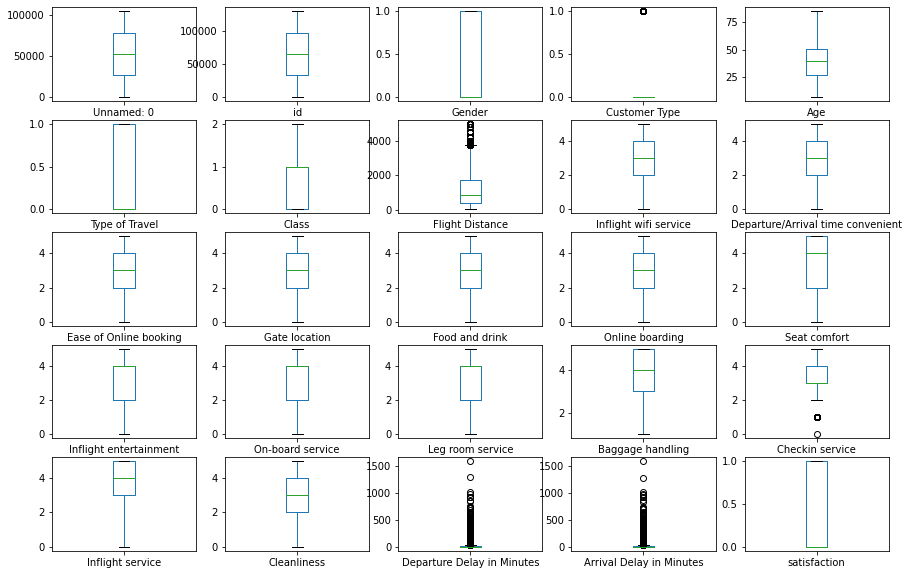

In [15]:
# drawing a box plots for all columns

df.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,10))
plt.show()

In [16]:
df = df.drop(['Unnamed: 0'], axis=1) # drop unrelated columns
ids = df.pop('id')

In [17]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0,1


## 3.4 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.



In [18]:
##---------Type the code below this line------------------##
y = df.satisfaction
X = df.copy()
X.drop(['satisfaction'],axis=1,inplace=True)
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0


In [19]:
print(X.shape)
print(y.shape)

(103904, 22)
(103904,)


In [20]:
y

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int64

Check satisfaction balancing

In [21]:
df['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

Target Value Distribution

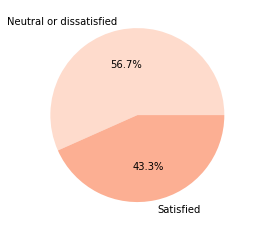

In [22]:
plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], 
        colors = sns.color_palette("Reds"), autopct = '%1.1f%%')
pass

It appears that the data has a relatively good balance between the categories of the target column, and therefore we will not manipulate, this is natural balance.

## 3.5 Split the data into training set and testing set

In [23]:
##---------Type the code below this line------------------##
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X,y , test_size=0.30 , random_state = 42,shuffle=True,stratify=y)

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(72732, 22)
(72732,)
(31172, 22)
(31172,)


scalling the data

In [25]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## 3.6 Report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset

Score: 3 Marks

##---------Type the answer below this line------------------##

In [1]:
from prettytable import PrettyTable 
x = PrettyTable()
x.field_names = ["Subject","Method Adopted", "Result", "Justification"]
x._max_width = {"Subject":20,"Method Adopted":10, "Result":15, "Justification" :20}
x.add_row(["Duplicate Data","DataFrame. duplicated().any()","No duplicate data present","returns a boolean series which identifies whether a row is duplicate or unique"])
x.add_row(["Missing Data","isnull()","Arrival Delay in Minutes  column is the only column that has missing data in it (310 missing values)","isnull function help in checking whether a value is null or not"])
x.add_row(["Data Inconsistency","value_counts()","Natural balance","This method helps to check if there is an imbalance in the classes present in target variable. To balance, we can either oversample or undersample the data"])
x.add_row(["Encode Categorical Data","LabelEncoder","four columns are transformed to numerical labels such as satisfaction, Class, Customer Type, Type of Travel ","LabelEncoder is used to normalize labels"])
x.add_row(["Normalization Technique Used","StandardScaler()","mean of the attribute becomes zero","removes the mean and scales each feature/variable to unit variance"])
print('Report result ')
print(x)
 

Report result 
+----------------------+----------------+-----------------+----------------------+
|       Subject        | Method Adopted |      Result     |    Justification     |
+----------------------+----------------+-----------------+----------------------+
|    Duplicate Data    | DataFrame. dup |   No duplicate  |  returns a boolean   |
|                      | licated().any( |   data present  |     series which     |
|                      |       )        |                 | identifies whether a |
|                      |                |                 | row is duplicate or  |
|                      |                |                 |        unique        |
|     Missing Data     |    isnull()    |  Arrival Delay  | isnull function help |
|                      |                |    in Minutes   | in checking whether  |
|                      |                |  column is the  |  a value is null or  |
|                      |                |   only column   |         not 

# 4. Deep Neural Network Architecture



## 4.1 Design the architecture that you will be using to solve the prediction problem identified.

* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [35]:
##---------Type the code below this line------------------##
from keras.models import Sequential
from keras import layers
from keras.layers import Dense

In [36]:
input_dim = x_train.shape[1]  # Number of features
print("Number of features::", input_dim)
from tensorflow import keras
model = keras.Sequential(
    [
        keras.layers.Dense(
            12, activation="relu", input_shape=(input_dim,)
        ),
        keras.layers.Dense(12, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(8, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)

Number of features:: 22


In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                276       
                                                                 
 dense_5 (Dense)             (None, 12)                156       
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 545
Trainable params: 545
Non-trainable 

## 4.2 Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Activation function used in each hidden layer
* Activation function used in the output layer
* Total number of trainable parameters 

Score: 4 Marks

In [2]:
##---------Type the answer below this line------------------##
from prettytable import PrettyTable 
x = PrettyTable()
x.field_names = ["Subject", "Result", "Justification"]
x._max_width = {"Subject":30, "Result":15, "Justification" : 30}
x.add_row(["Number of layers","4","1 for input + 2 hidden layers + 1 output layer"])
x.add_row(["Number of units in each layer","22,12,8,1","22 in input,12 & 8 in dense ,output have 1 "])
x.add_row(["Activation function used in each hidden layer","relu","Used ReLU in hidden layer to avoid vanishing gradient problem and better computation performance"])
x.add_row(["Activation function used in the output layer","sigmoid","Used sigmoid to add non-linearity in the model"])
x.add_row(["Total number of trainable parameters","545","total parameter used"])
print('Report result ')
print(x)

Report result 
+--------------------------------+-----------+--------------------------------+
|            Subject             |   Result  |         Justification          |
+--------------------------------+-----------+--------------------------------+
|        Number of layers        |     4     | 1 for input + 2 hidden layers  |
|                                |           |        + 1 output layer        |
| Number of units in each layer  | 22,12,8,1 |  22 in input,12 & 8 in dense   |
|                                |           |         ,output have 1         |
|  Activation function used in   |    relu   |  Used ReLU in hidden layer to  |
|       each hidden layer        |           |    avoid vanishing gradient    |
|                                |           | problem and better computation |
|                                |           |          performance           |
|  Activation function used in   |  sigmoid  |    Used sigmoid to add non-    |
|        the output layer

In [42]:
# 5. Training the model


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations



In [43]:
##---------Type the code below this line------------------##
# compile the keras model binary_crossentropy
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.Recall(name="accuracy")
]
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=metrics)

## 5.2 Train the model

In [44]:
##---------Type the code below this line------------------##
# fit the keras model on the dataset
history = model.fit(x_train,y_train, epochs=100, batch_size=10, validation_data=(x_test, y_test))


Epoch 1/100
7274/7274 [==============================] - 10s 1ms/step - loss: 1.7453 - fn: 30510.0000 - fp: 1339.0000 - tn: 39876.0000 - tp: 1007.0000 - precision: 0.4292 - recall: 0.0320 - accuracy: 0.0320 - val_loss: 0.6835 - val_fn: 13508.0000 - val_fp: 0.0000e+00 - val_tn: 17664.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
7274/7274 [==============================] - 9s 1ms/step - loss: 0.6753 - fn: 31516.0000 - fp: 17.0000 - tn: 41198.0000 - tp: 1.0000 - precision: 0.0556 - recall: 3.1729e-05 - accuracy: 3.1729e-05 - val_loss: 0.6130 - val_fn: 13508.0000 - val_fp: 0.0000e+00 - val_tn: 17664.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
7274/7274 [==============================] - 9s 1ms/step - loss: 0.6030 - fn: 8942.0000 - fp: 15207.0000 - tn: 26008.0000 - tp: 22575.0000 - precision: 0.5975 - recall: 0.7163 - accuracy: 0.7163 - val_loss:

Justify your choice of optimizers and regulizations used and the hyperparameters tuned

Score: 4 Marks

##---------Type the answers below this line------------------##

We have used Adam optimizer (Adaptive Moment Estimation) technique for for gradient descent.The method is really efficient when working with large problem involving a lot of data or parameters. It requires less memory and is efficient.

we have also used dropout regularization technique as we have a large neural network structure in order to introduce more randomness. At every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections. So each iteration has a different set of nodes and this results in a different set of outputs. It can also be thought of as an ensemble technique in machine learning.

# 6. Test the model

Score: 2 Marks

We can use test data as validation data and can check the accuracies after every epoch. This will give us an insight into overfitting at the time of training only and we can take steps before the completion of all epochs

In [45]:
history1 = model.fit(x_train,y_train, epochs=100, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/100
7274/7274 [==============================] - 9s 1ms/step - loss: 0.2161 - fn: 2491.0000 - fp: 3575.0000 - tn: 37640.0000 - tp: 29026.0000 - precision: 0.8903 - recall: 0.9210 - accuracy: 0.9210 - val_loss: 0.1855 - val_fn: 1257.0000 - val_fp: 794.0000 - val_tn: 16870.0000 - val_tp: 12251.0000 - val_precision: 0.9391 - val_recall: 0.9069 - val_accuracy: 0.9069
Epoch 2/100
7274/7274 [==============================] - 9s 1ms/step - loss: 0.2117 - fn: 2447.0000 - fp: 3495.0000 - tn: 37720.0000 - tp: 29070.0000 - precision: 0.8927 - recall: 0.9224 - accuracy: 0.9224 - val_loss: 0.1749 - val_fn: 1051.0000 - val_fp: 998.0000 - val_tn: 16666.0000 - val_tp: 12457.0000 - val_precision: 0.9258 - val_recall: 0.9222 - val_accuracy: 0.9222
Epoch 3/100
7274/7274 [==============================] - 9s 1ms/step - loss: 0.2146 - fn: 2432.0000 - fp: 3643.0000 - tn: 37572.0000 - tp: 29085.0000 - precision: 0.8887 - recall: 0.9228 - accuracy: 0.9228 - val_loss: 0.1938 - val_fn: 1560.0000 - val_f

## 7. Conclusion 

Plot the training and validation loss
Report the testing accuracy and loss.

Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, MAE etc per the requirement of your application/problem.

Score 2 Marks

### confusion matrix 

In [46]:
##---------Type the answer below this line------------------##
from prettytable import PrettyTable 
x = PrettyTable()
x.field_names = ["positive", "Negative"]
x._max_width = {"posite":30, "Negative":50}
x.add_row([history.history['tp'][-1],history.history['fp'][-1]])
x.add_row([history.history['fn'][-1],history.history['tn'][-1]])

print('confusion matrix for training')
print(x)

confusion matrix for training
+----------+----------+
| positive | Negative |
+----------+----------+
| 29099.0  |  3568.0  |
|  2418.0  | 37647.0  |
+----------+----------+


In [47]:
print('Train precision:',history.history['precision'][-1])
print('Train recall:',history.history['recall'][-1])
print('Train accuracy:',history.history['accuracy'][-1])
F1score= 2*(history.history['precision'][-1])*(history.history['recall'][-1])/(history.history['precision'][-1])+(history.history['recall'][-1])
print('Train F1-score:',F1score) 

Train precision: 0.8907766342163086
Train recall: 0.9232795238494873
Train accuracy: 0.9232795238494873
Train F1-score: 2.769838571548462


In [48]:
##---------Type the answer below this line------------------##
from prettytable import PrettyTable 
x = PrettyTable()
x.field_names = ["positive", "Negative"]
x._max_width = {"posite":30, "Negative":50}
x.add_row([history.history['val_tp'][-1],history.history['val_fp'][-1]])
x.add_row([history.history['val_fn'][-1],history.history['val_tn'][-1]])

print('confusion matrix for test')
print(x)

confusion matrix for test
+----------+----------+
| positive | Negative |
+----------+----------+
| 12038.0  |  678.0   |
|  1470.0  | 16986.0  |
+----------+----------+


In [49]:
print('Test precision:',history.history['val_precision'][-1])
print('Test recall:',history.history['val_recall'][-1])
print('Test accuracy:',history.history['val_accuracy'][-1])
F1score=2*(history.history['val_precision'][-1])*(history.history['val_recall'][-1])/(history.history['val_precision'][-1])+(history.history['val_recall'][-1])
print('Test F1-score:',F1score)

Test precision: 0.9466813206672668
Test recall: 0.8911756277084351
Test accuracy: 0.8911756277084351
Test F1-score: 2.673526883125305


Our model is working fine. Now we will visualize training and validation losses and accuracies

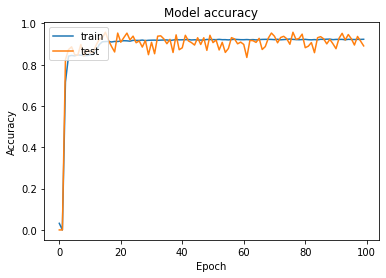

In [50]:
##---------Type the code below this line------------------##
# summarize history for accuracy

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

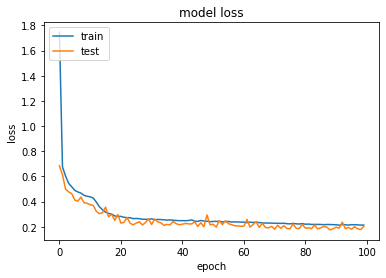

In [51]:
# summarize history for loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
from sklearn.metrics import r2_score, mean_squared_error
Ypredicted = model.predict(x_test)
print("Mean Squared Error: \t", mean_squared_error(y_test, Ypredicted))
print("R2 Score: \t\t", r2_score(y_test, Ypredicted))

975/975 [==============================] - 1s 580us/step
Mean Squared Error: 	 0.04890383211233266
R2 Score: 		 0.8008445851508671


## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

In [54]:
##---------Type the answers below this line------------------##


There are many factors which can affect the viability of a business from its competitiveness to its reputation and customer satisfaction. Customer satisfaction is particularly key as it can affect whether a customer is likely to reuse the service and whether they are likely to recommend the service. This is further emphasised by sources which highlight that retaining existing customers can be 4 to 10 times more cost effective then securing new customers.
**We used deep learning model to predict customer satisfaction.**

we found saveral missing data we replaced that with mean value, data type was not consistent so we changes as per need.we droped some unnessary features as well.
In model training phase we faced main problem our modle accuracy was not improving beyound 85%.So try with different model architecture by changing no of layer, dropout, optimizer , no epoch etc.
first we tried with 10 epoch than increased it 150 and so on, Finally we got best accuracy with 100 epoch and with above mention architecture. We can improve the model performance more with some other model architecture. 

##NOTE
All Late Submissions will incur a penalty of -2 marks. So submit your assignments on time.

Good Luck